# 1. Load

## 1.1 Import libraries and load data

In [ ]:
# Importing libraries and data loading
from urllib.request import urlopen
import zipfile
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve

# Link to the data
url = "https://github.com/CapitalOneRecruiting/DS/raw/master/transactions.zip"

json_file_name = "transactions.txt"

zip_file = urlopen(url).read()

with zipfile.ZipFile(io.BytesIO(zip_file)) as z:
    with z.open(json_file_name) as f:
        data = pd.read_json(f, lines=True)

## 1.2 Basic Data Exploration

In [ ]:
# Checking shape of data
print("Number of records in the data:", data.shape[0])
print("Number of fields in each record:", data.shape[1])

Number of records in the data: 786363
Number of fields in each record: 29


In [ ]:
# Checking the sample of the data
data.head(5)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


In [ ]:
# Checking for columns in the data
data.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [ ]:
# Basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [ ]:
# Basic description of the dataset with maximum and minimum values
data.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,544.467338,544.183857,4757.417799,4508.739089
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,261.524220,261.551254,2996.583810,6457.442068
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,100.000000,0.000000,0.000000,0.000000
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,310.000000,310.000000,2178.000000,689.910000
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,535.000000,535.000000,4733.000000,2451.760000
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,785.000000,785.000000,7338.000000,5291.095000
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,998.000000,998.000000,9998.000000,47498.810000


In [ ]:
# Number of unique values per column
data.nunique()

accountNumber                 5000
customerId                    5000
creditLimit                     10
availableMoney              521915
transactionDateTime         776637
transactionAmount            66038
merchantName                  2490
acqCountry                       5
merchantCountryCode              5
posEntryMode                     6
posConditionCode                 4
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1820
dateOfLastAddressChange       2184
cardCVV                        899
enteredCVV                     976
cardLast4Digits               5245
transactionType                  4
echoBuffer                       1
currentBalance              487318
merchantCity                     1
merchantState                    1
merchantZip                      1
cardPresent                      2
posOnPremises                    1
recurringAuthInd                 1
expirationDateKeyInMatch         2
isFraud             

In [ ]:
# Some cells have empty strings, replacing those with nan since nan can be handled easier
data.replace('', np.nan, inplace=True)

## 1.3 Handle Missing Values

In [ ]:
# Get a count of missing values in each feature
print(data.isnull().sum())

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

As we can see, few columns are completely empty, so we need to remove those right away.

In [ ]:
emptyColumns = ['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd']
data.drop(emptyColumns, axis=1, inplace=True)

# 2. Plot

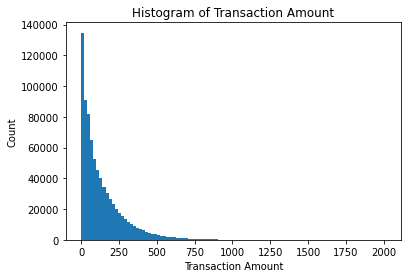

In [ ]:
plt.hist(data['transactionAmount'], bins=100)
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.title('Histogram of Transaction Amount')
plt.show()

Based on the histogram, we can see that the distribution of transaction amounts is highly skewed to the right, with a long tail of high-value transactions. There is a sharp peak at around 0, which represents the large number of transactions with small amounts. This suggests that there may be a large number of low-value transactions made by a large number of customers, and a small number of high-value transactions made by a smaller number of customers.

One hypothesis for the long tail of high-value transactions is that they may be related to specific merchants or types of transactions. For example, large transactions may be more common for travel-related expenses or high-end luxury goods.

In [ ]:
le = LabelEncoder()
data['isFraud'] = le.fit_transform(data['isFraud'])

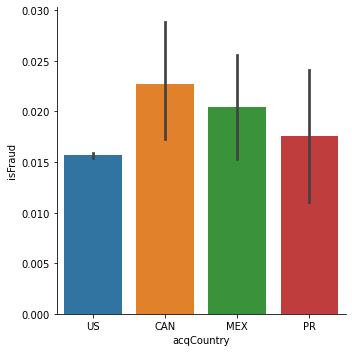

In [ ]:
sns.catplot(data=data, x="acqCountry", y="isFraud", kind="bar")

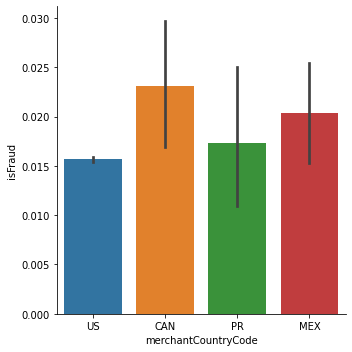

In [ ]:
sns.catplot(data=data, x="merchantCountryCode", y="isFraud", kind="bar")

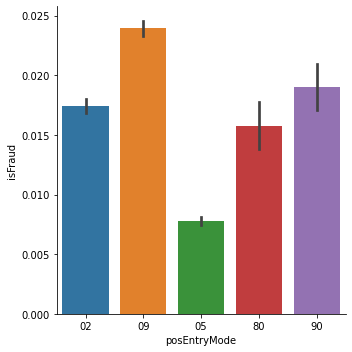

In [ ]:
sns.catplot(data=data, x="posEntryMode", y="isFraud", kind="bar")

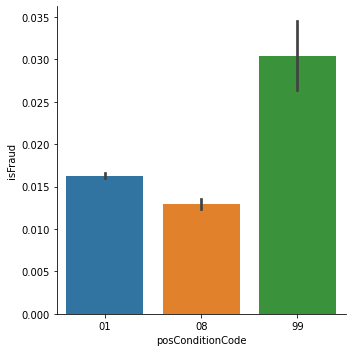

In [ ]:
sns.catplot(data=data, x="posConditionCode", y="isFraud", kind="bar")

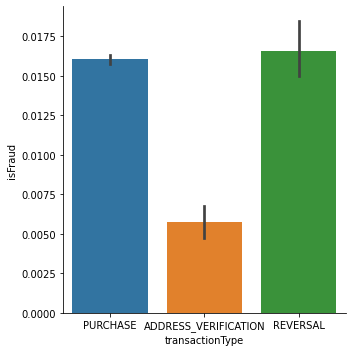

In [ ]:
sns.catplot(data=data, x="transactionType", y="isFraud", kind="bar")

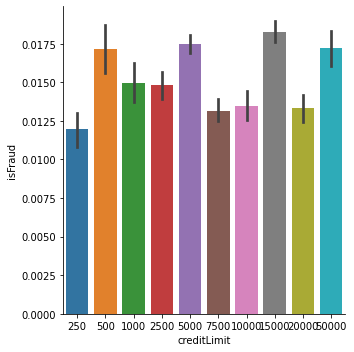

In [ ]:
sns.catplot(data=data, x="creditLimit", y="isFraud", kind="bar")

Based on the above graphs, we can see that these features seem important as the variation in these features have an effect on the fraud transactions.

/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


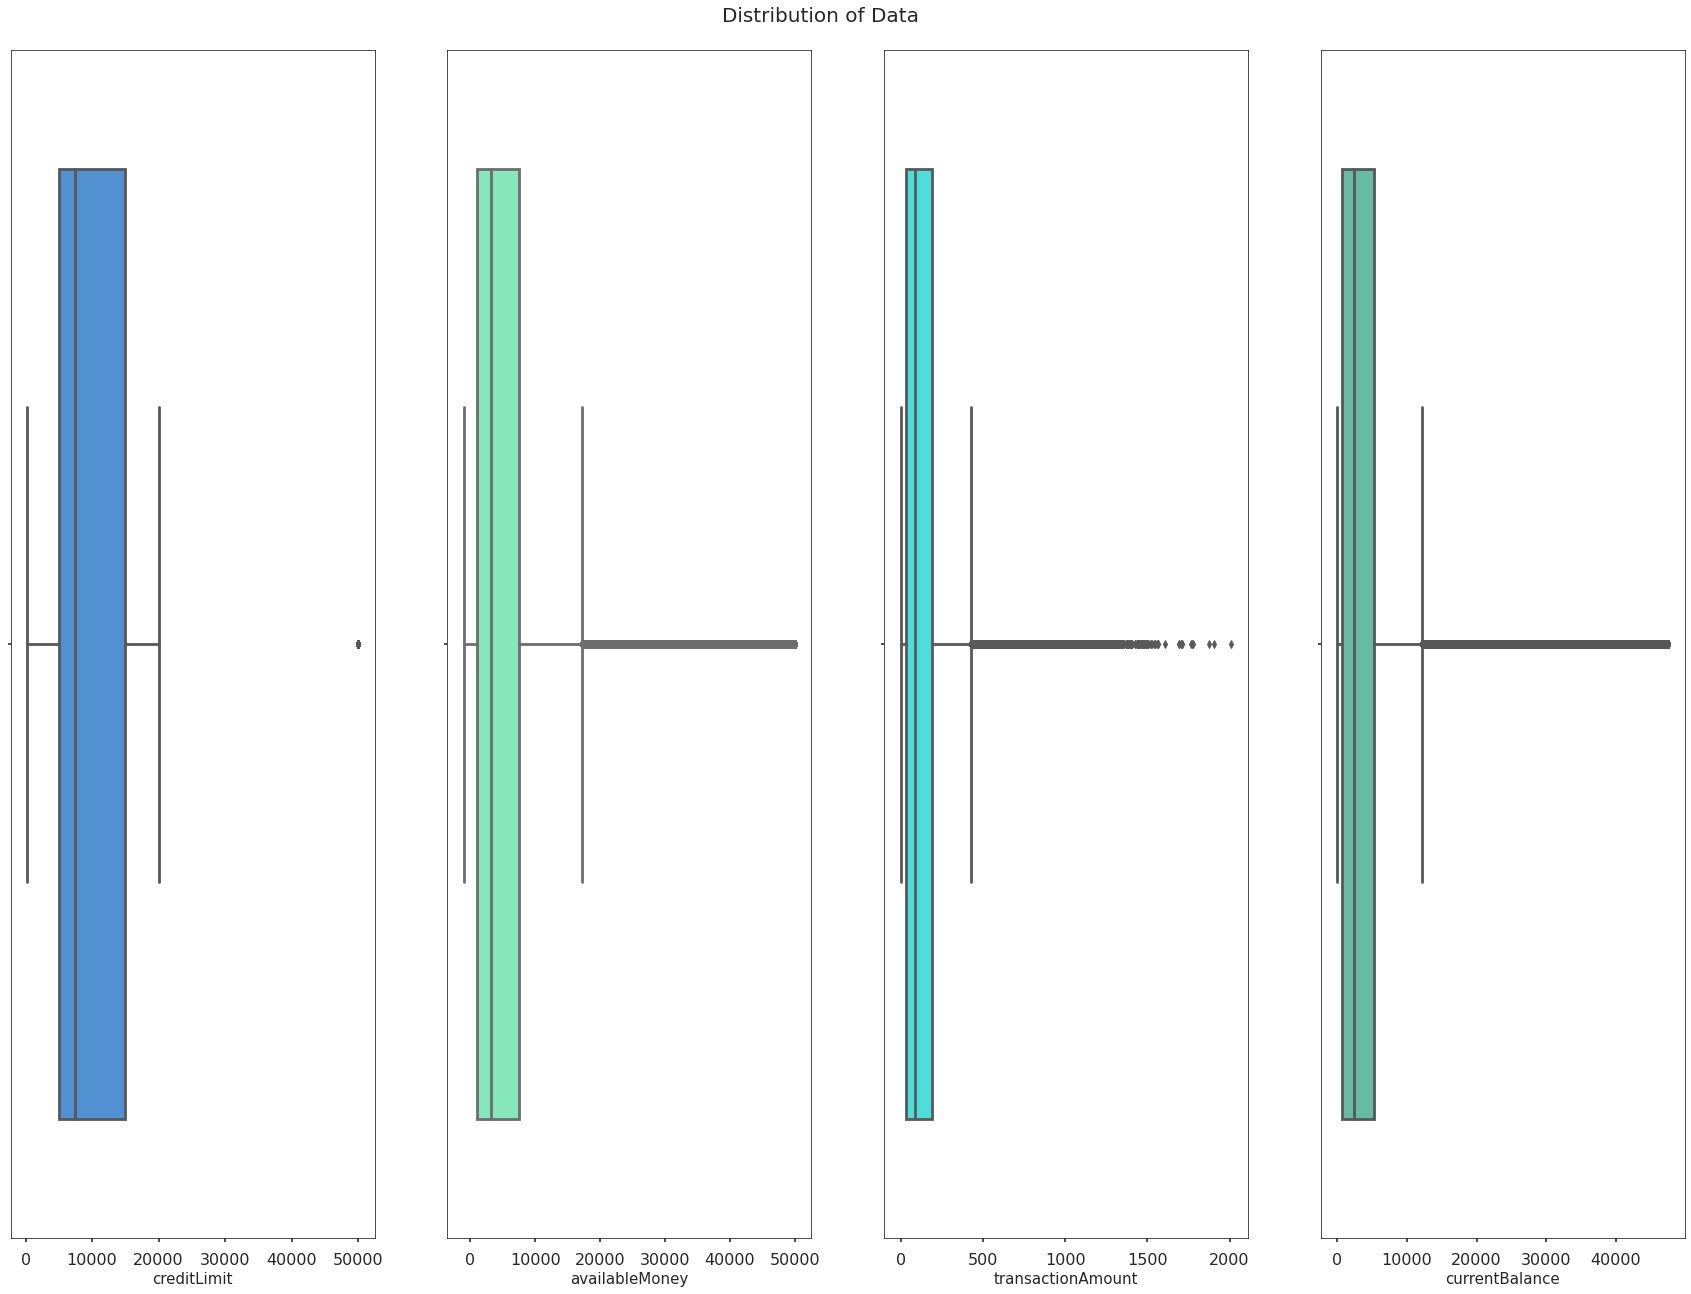

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(30,20))

columns = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']
colors = ['#3C91E6', '#76F7BF', '#34F6F2', '#59C9A5']

for i in range(len(columns)):
    sns.boxplot(data=data, x=columns[i], ax=ax[i], color=colors[i], orient='v')
    ax[i].set_xlabel(columns[i], fontsize=15)
    ax[i].set_ylabel('')
plt.suptitle('Distribution of Data', fontsize=20.
             )
fig.subplots_adjust(top=0.95)

1. Credit Limit: There seems to be a few outliers at 50000
2. availableMoney: Right skewed, few outliers increasing the mean slightly
3. transactionAmount: Right skewed, few outlier increasing the mean slightly
4. currentBalance: Right skewed, average bank balance is on the low side

# 3. Data Wrangling - Duplicate Transactions

In [ ]:
reversed_transactions = data[data['transactionType'] == 'REVERSAL']
total_reversed_transactions = len(reversed_transactions)
total_reversed_amount = reversed_transactions['transactionAmount'].sum()

multi_swipe_transactions = []
for cust_id in data['accountNumber'].unique():
    card_transactions = data[data['accountNumber'] == cust_id].sort_values(by=['merchantName', 'transactionDateTime'])
    for i in range(1, len(card_transactions)):
        current = datetime.strptime(card_transactions.iloc[i]['transactionDateTime'].replace('T', ' '), '%Y-%m-%d %H:%M:%S')
        previous = datetime.strptime(card_transactions.iloc[i-1]['transactionDateTime'].replace('T', ' '), '%Y-%m-%d %H:%M:%S')
        if (current - previous).total_seconds() <= 300:
            if card_transactions.iloc[i]['transactionAmount'] == card_transactions.iloc[i-1]['transactionAmount'] and card_transactions.iloc[i]['merchantName'] == card_transactions.iloc[i-1]['merchantName']:
                multi_swipe_transactions.append(card_transactions.iloc[i])

multi_swipe_transactions = pd.DataFrame(multi_swipe_transactions)

In [ ]:
print("Total number of reversed transactions:", total_reversed_transactions)
print("Total dollar amount of reversed transactions:", total_reversed_amount)
print("Total number of multi-swipe transactions:", len(multi_swipe_transactions))
print("Total dollar amount of multi-swipe transactions:", multi_swipe_transactions['transactionAmount'].sum())

Total number of reversed transactions: 20303
Total dollar amount of reversed transactions: 2821792.5
Total number of multi-swipe transactions: 13386
Total dollar amount of multi-swipe transactions: 1931880.14


One interesting thing about the reversed transactions is that the average transaction amount is higher than that of normal transactions (138.98 vs 136.99), indicating that fraudsters may be more likely to target larger transactions for reversal. For multi-swipe transactions, the average transaction amount is also higher than that of normal transactions ($144.32 vs $136.99), suggesting that certain types of merchants or transactions may be more prone to accidental multiple charges.

Also, after experimenting, I found that as I increase the time margin for finding multi swipe transactions, we get more such transactions. But the number stabalizes as the time margin goes above 200 seconds.

In [ ]:
# Removing reveresed and multi swipe transactions to remove invalidity from the data
indices_to_remove = set(reversed_transactions.index).union(set(multi_swipe_transactions.index))
cleaned_transactions = data.drop(list(indices_to_remove))

# 4. Model

## 4.1 Feature Engineering

Logically, if the entered CVV is not the same as the card CVV then the transaction is invalid. Hence, We'll only consider transactions in which both the CVVs match.

In [ ]:
cleaned_transactions['matchingCVV'] = cleaned_transactions['cardCVV'] == cleaned_transactions['enteredCVV']

for column in ['cardPresent', 'expirationDateKeyInMatch', 'matchingCVV']:
    cleaned_transactions[column].replace({True: 1, False: 0}, inplace=True)

In [ ]:
cleaned_transactions.corr()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,matchingCVV
accountNumber,1.000000,1.000000,0.140409,0.066194,-0.001224,-0.011213,-0.011173,0.038734,0.161991,0.005838,-0.001057,-0.003941,0.005147
customerId,1.000000,1.000000,0.140409,0.066194,-0.001224,-0.011213,-0.011173,0.038734,0.161991,0.005838,-0.001057,-0.003941,0.005147
creditLimit,0.140409,0.140409,1.000000,0.835159,0.005575,0.050444,0.050529,0.124581,0.652700,-0.004113,0.002380,0.003330,0.000958
availableMoney,0.066194,0.066194,0.835159,1.000000,-0.010572,0.015838,0.015907,0.073247,0.128413,0.002007,0.004151,-0.001423,-0.000880
transactionAmount,-0.001224,-0.001224,0.005575,-0.010572,1.000000,-0.000425,-0.000369,-0.001689,0.024615,0.037671,0.001785,0.075669,0.001151
cardCVV,-0.011213,-0.011213,0.050444,0.015838,-0.000425,1.000000,0.995980,-0.011599,0.069140,-0.045181,-0.000609,0.008657,-0.002999
enteredCVV,-0.011173,-0.011173,0.050529,0.015907,-0.000369,0.995980,1.000000,-0.011479,0.069197,-0.044989,-0.000389,0.008659,0.008270
cardLast4Digits,0.038734,0.038734,0.124581,0.073247,-0.001689,-0.011599,-0.011479,1.000000,0.123737,0.041541,0.002241,0.000890,-0.001164
currentBalance,0.161991,0.161991,0.652700,0.128413,0.024615,0.069140,0.069197,0.123737,1.000000,-0.010181,-0.001426,0.007965,0.002940
cardPresent,0.005838,0.005838,-0.004113,0.002007,0.037671,-0.045181,-0.044989,0.041541,-0.010181,1.000000,0.040680,-0.043308,0.002996


In [ ]:
# Drop unnecessary columns and only keep the relevant features
df = cleaned_transactions.drop(['accountNumber', 'customerId', 'transactionDateTime', 'merchantName', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits'], axis=1)

In [ ]:
df['isFraud'].value_counts()

0    746444
1     11951
Name: isFraud, dtype: int64

As we can see, the data is highly imbalanced and that makes sense as well. Number of fraudulent transaction need to be as minimum as possible in the real world.
Now, we can't work with this data as it is, since it might create problems while modelling. Hence we use under sampling technique. So we take equal number of transactions of non fraudulent category as the fraudulent ones. Hence we can work with a balanced dataset to create a model. Later this model can be generalized to work with imabalanced data.

In [ ]:
y = df['isFraud']
df.drop('isFraud', inplace=True, axis=1)

rus = RandomUnderSampler()
X, y = rus.fit_resample(df, y)

print('Before Under Sampling:', df.shape)
print('After Under Sampling:', X.shape)

Before Under Sampling: (758395, 13)
After Under Sampling: (23902, 13)


In [ ]:
# Split the data under sampled data into 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4.2 Feature Selection

In [ ]:
# Prepare list of features which need further preprocessing. We can do all the necessary preprocessing in the pipieline before traning a model.
numeric_features = ['availableMoney', 'transactionAmount', 'currentBalance']
nominal_features = ['acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'merchantCategoryCode', 'transactionType']
ordinal_features = ['creditLimit']

In [ ]:
# Feature Conversion Pipeline
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
nominal_transformer = Pipeline(steps=[('cat_imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore'))])
ordinal_transformer = Pipeline(steps=[('cat_imputer', SimpleImputer(strategy='most_frequent')), ('ordinal', OrdinalEncoder())])

pipeline = ColumnTransformer([
('num', numeric_transformer, numeric_features),
('nom', nominal_transformer, nominal_features),
('ord', ordinal_transformer, ordinal_features)])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

## 4.3 Modeling


I tried Logistic Regression because it is a great starting point. And in many cases it performs really well for binary classification problems.

In [ ]:
# Using grid search to find the best suitable parameters for Logistic Regression
lr_params = {
    'max_iter': [1000, 5000, 10000, 50000],
    'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]
}

lr_gs = GridSearchCV(estimator=LogisticRegression(), param_grid=lr_params, cv=5)
lr_gs.fit(X_train, y_train)

print("Logistic Regression:")
print("Best hyperparameters:", lr_gs.best_params_)
print("Mean test score:", lr_gs.best_score_)

Logistic Regression:
Best hyperparameters: {'C': 0.1, 'max_iter': 1000}
Mean test score: 0.6792530833811906


I'm trying Random Forest Classifier because it is known for higher accuracy yielding algorithm. Also, it is an ensamble technique so it generalizes well. It is also less prone to outliers and it is easily scalable. In out case we might want to extend our model to tons of data. So this seems like a suitable choice.

In [ ]:
# Using grid search to find the best suitable parameters for Random Forest Classifier
rfc_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 3, 5],
    'bootstrap': [True, False],
}

rfc_gs = GridSearchCV(estimator=RandomForestClassifier(), param_grid=rfc_params, cv=5)
rfc_gs.fit(X_train, y_train)

print("Random Forest Classifier:")
print("Best hyperparameters:", rfc_gs.best_params_)
print("Mean test score:", rfc_gs.best_score_)

Random Forest Classifier:
Best hyperparameters: {'bootstrap': True, 'max_depth': 5, 'n_estimators': 100}
Mean test score: 0.6788872207181338


I'm gonna try XGBoost Classfier because it is a well known algorithm for handling imbalanced data and also in handling missing data. Even though we have taken care of these things in this case, we might want to extend this model to unseen data that might have these problems. So it is a suitable choice. It is designed to be fast and easily scalable and is less prone to overfitting. 

In [ ]:
# Using grid search to find the best suitable parameters for XGBoost Classifier
xgb_params = {
    'max_depth': [3, 5, 7], 
    'learning_rate': [0.01, 0.1, 0.5], 
    'n_estimators': [100, 150, 200]
}

xgb_gs = GridSearchCV(estimator=XGBClassifier(), param_grid=xgb_params, cv=5)
xgb_gs.fit(X_train, y_train)

print("XGBoost Classifier:")
print("Best hyperparameters:", xgb_gs.best_params_)
print("Mean test score:", xgb_gs.best_score_)

XGBoost Classifier:
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Mean test score: 0.7052983974621927


## 4.4 Metrics

It is important to try our different models and compare the results because every model fits differently on different datasets. And not always we can predict the quality of the incoming data. So here I use the best models tried above and compare their performances on unseen data.

In [ ]:
lr = LogisticRegression(**lr_gs.best_params_)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

[[1596  791]
 [ 668 1726]]
              precision    recall  f1-score   support

           0       0.70      0.67      0.69      2387
           1       0.69      0.72      0.70      2394

    accuracy                           0.69      4781
   macro avg       0.70      0.69      0.69      4781
weighted avg       0.70      0.69      0.69      4781



In [ ]:
rfc = RandomForestClassifier(**rfc_gs.best_params_)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print(confusion_matrix(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))

[[1621  766]
 [ 702 1692]]
              precision    recall  f1-score   support

           0       0.70      0.68      0.69      2387
           1       0.69      0.71      0.70      2394

    accuracy                           0.69      4781
   macro avg       0.69      0.69      0.69      4781
weighted avg       0.69      0.69      0.69      4781



In [ ]:
xgb = XGBClassifier(**xgb_gs.best_params_)
xgb.fit(X_train, y_train) 
y_pred_xgb = xgb.predict(X_test)
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

[[1714  673]
 [ 682 1712]]
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      2387
           1       0.72      0.72      0.72      2394

    accuracy                           0.72      4781
   macro avg       0.72      0.72      0.72      4781
weighted avg       0.72      0.72      0.72      4781



# 5. Conclusion

a) XGBoost Classifier performs the best of all the models tried.

b) As the cross validation and test results are pretty similar, we can conclude that the model has not underfit or overfit.

c) With more time, I would be interested in checking accuracy of the models tried with more amount of data as under sampling removed a large chunk of the data.

d) The confusion matrix suggests that the model is able to identify many fraudulent transactions and if time permits these models can be further optimized for better results.